### **1.Consumo di alcol per paese** 
Esegui un’**analisi esplorativa** focalizzata sul **consumo di alcol**.  
Analizza i seguenti aspetti:
* Visualizza i primi 10 paesi ordinati per total_litres_of_pure_alcohol (dal più alto)

* Calcola la media del consumo di birra, vino, e distillati

* Crea una nuova colonna alcohol_index che sia: `(beer_servings + wine_servings + spirit_servings) / 3`

* Trova il paese con il valore massimo di alcohol_index

* Filtra solo i paesi che consumano più di 100 birre all’anno

Crea un bar chart dei 10 paesi con più consumo totale (total_litres_of_pure_alcohol)

Crea un line plot con wine_servings ordinato per paese (usa sort_values)

Top 10 per consumo totale di alcol:
                 country  total_litres_of_pure_alcohol
15              Belarus                          14.4
98            Lithuania                          12.9
3               Andorra                          12.4
68              Grenada                          11.9
61               France                          11.8
45       Czech Republic                          11.8
141  Russian Federation                          11.5
99           Luxembourg                          11.4
155            Slovakia                          11.4
81              Ireland                          11.4

Media birra: 106.16062176165804
Media vino: 49.45077720207254
Media distillati: 80.99481865284974

Paese con massimo alcohol_index:
 country             Andorra
alcohol_index    231.666667
Name: 3, dtype: object

Paesi con più di 100 birre/anno:
                country  beer_servings
3              Andorra            245
4               Angola            217
5    An

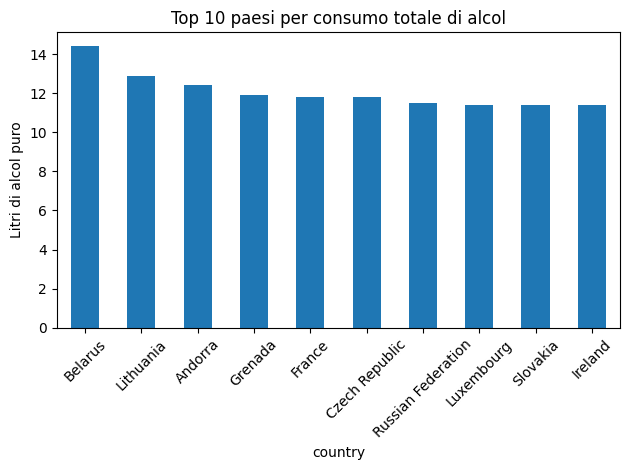

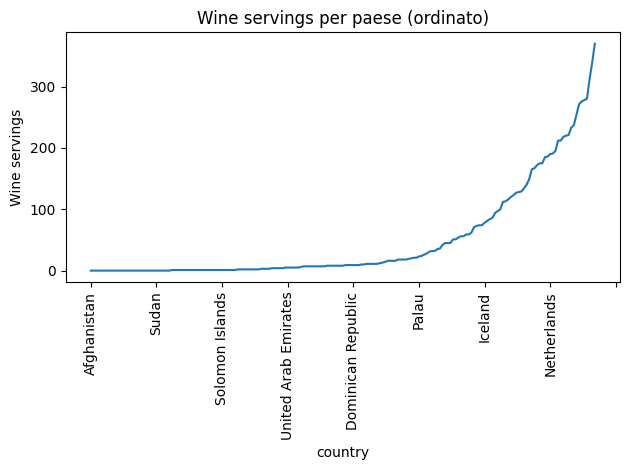

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/alcohol-consumption/drinks.csv")

# Visualizza i primi 10 paesi ordinati per total_litres_of_pure_alcohol
top10_totale = df.sort_values(by='total_litres_of_pure_alcohol', ascending=False).head(10)
print("Top 10 per consumo totale di alcol:\n", top10_totale[['country', 'total_litres_of_pure_alcohol']])

# Calcola la media del consumo di birra, vino e distillati
media_birra = df['beer_servings'].mean()
media_vino = df['wine_servings'].mean()
media_distillati = df['spirit_servings'].mean()
print("\nMedia birra:", media_birra)
print("Media vino:", media_vino)
print("Media distillati:", media_distillati)

# Crea nuova colonna "alcohol_index"
df['alcohol_index'] = (df['beer_servings'] + df['wine_servings'] + df['spirit_servings']) / 3

# Trova il paese con il valore massimo di alcohol_index
max_index_country = df.loc[df['alcohol_index'].idxmax()]
print("\nPaese con massimo alcohol_index:\n", max_index_country[['country', 'alcohol_index']])

# Filtra i paesi che consumano più di 100 birre all'anno
filtro_birra = df[df['beer_servings'] > 100]
print("\nPaesi con più di 100 birre/anno:\n", filtro_birra[['country', 'beer_servings']])

# Bar chart dei 10 paesi con più consumo totale
top10_totale.plot(kind='bar', x='country', y='total_litres_of_pure_alcohol', legend=False,
                  title='Top 10 paesi per consumo totale di alcol')
plt.ylabel("Litri di alcol puro")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Line plot ordinato per wine_servings
df.sort_values(by='wine_servings').plot(kind='line', x='country', y='wine_servings', legend=False,
                                         title='Wine servings per paese (ordinato)')
plt.ylabel("Wine servings")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
